# A Comparative Study of Linear Regression and Random Forest on California Housing Data

Import libraries

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

Load California Housing dataset

In [16]:
housing = fetch_california_housing(as_frame=True)
df = housing.frame

Features and Target

In [17]:
X = df.drop("MedHouseVal", axis=1)
y = df["MedHouseVal"]

Train-test split

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

1) Linear Regression

In [19]:
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)

Evaluation

In [29]:
mae_lr = mean_absolute_error(y_test, y_pred_lr)
rmse_lr = np.sqrt(mean_squared_error(y_test, y_pred_lr))
r2_lr = r2_score(y_test, y_pred_lr)

In [33]:
print("Linear Regression Performance")
print(f"MAE  = {mae_lr:.3f}")
print(f"RMSE = {rmse_lr:.3f}")
print(f"R²   = {r2_lr:.3f}")
print("-"*40)

Linear Regression Performance
MAE  = 0.533
RMSE = 0.746
R²   = 0.576
----------------------------------------


2) Random Forest Regressor

In [34]:
rf_model = RandomForestRegressor(n_estimators=200, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

Evaluate model

In [24]:
mae_rf = mean_absolute_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
r2_rf = r2_score(y_test, y_pred_rf)

In [25]:
print("Random Forest Performance")
print(f"MAE  = {mae_rf:.3f}")
print(f"RMSE = {rmse_rf:.3f}")
print(f"R²   = {r2_rf:.3f}")

Random Forest Performance
MAE  = 0.327
RMSE = 0.504
R²   = 0.806


Visualization

Actual vs Predicted (Linear Regression only)


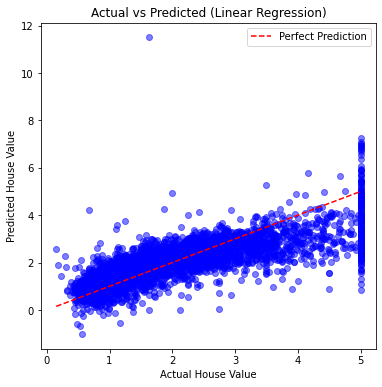

In [27]:
plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred_lr, alpha=0.5, color="blue")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], "--r", label="Perfect Prediction")
plt.xlabel("Actual House Value")
plt.ylabel("Predicted House Value")
plt.title("Actual vs Predicted (Linear Regression)")
plt.legend()
plt.show()

Comparison Plot LR vs RF

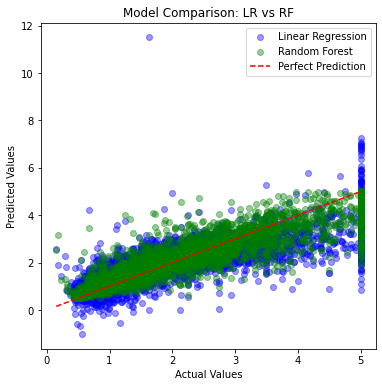

In [28]:
plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred_lr, alpha=0.4, color="blue", label="Linear Regression")
plt.scatter(y_test, y_pred_rf, alpha=0.4, color="green", label="Random Forest")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], "r--", label="Perfect Prediction")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.legend()
plt.title("Model Comparison: LR vs RF")
plt.show()

Feature Importance (Random Forest)

In [35]:
importances = rf_model.feature_importances_
features = X.columns

Sort features by importance

In [36]:
indices = np.argsort(importances)[::-1]

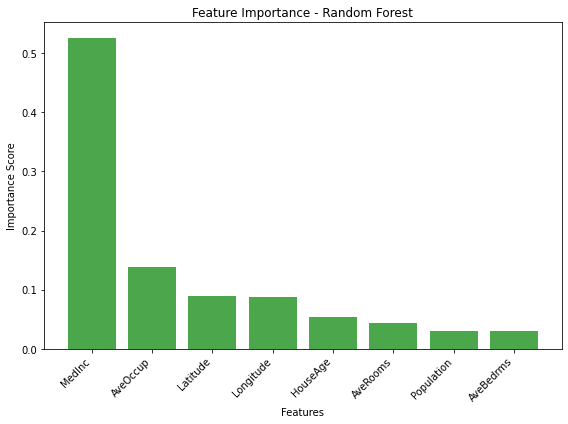

In [39]:
plt.figure(figsize=(8,6))
plt.bar(range(len(features)), importances[indices], align="center", color="green", alpha=0.7)
plt.xticks(range(len(features)), features[indices], rotation=45, ha="right")
plt.title("Feature Importance - Random Forest")
plt.xlabel("Features")
plt.ylabel("Importance Score")
plt.tight_layout()
plt.show()

Linear Regression Coefficients

In [41]:
lr_coeffs = lr_model.coef_

Normalize coefficients for better comparison

In [42]:
lr_coeffs_normalized = lr_coeffs / np.max(np.abs(lr_coeffs))

Random Forest Importances

In [43]:
rf_importances = rf_model.feature_importances_

Combine into DataFrame

In [46]:
feature_importance_df = pd.DataFrame({
    "Feature": X.columns,
    "Linear Regression (coeff)": lr_coeffs_normalized,
    "Random Forest (importance)": rf_importances
})

In [47]:
print(feature_importance_df)

      Feature  Linear Regression (coeff)  Random Forest (importance)
0      MedInc                   0.572914                    0.525886
1    HouseAge                   0.012417                    0.054355
2    AveRooms                  -0.157472                    0.044449
3   AveBedrms                   1.000000                    0.029608
4  Population                  -0.000003                    0.030693
5    AveOccup                  -0.004503                    0.138055
6    Latitude                  -0.536034                    0.088647
7   Longitude                  -0.553803                    0.088307


Plot side-by-side

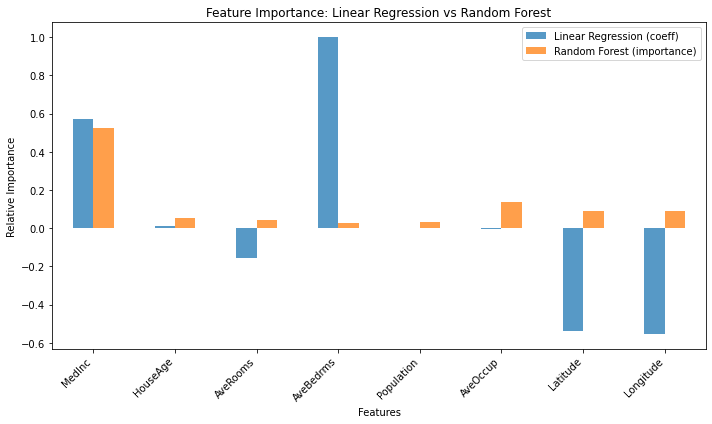

In [51]:
feature_importance_df.set_index("Feature").plot(
    kind="bar",
    figsize=(10,6),
    alpha=0.75
)
plt.title("Feature Importance: Linear Regression vs Random Forest")
plt.ylabel("Relative Importance")
plt.xlabel("Features")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

Our comparison shows that while Linear Regression gives a baseline with R² = 0.57, Random Forest significantly improves predictions (R² = 0.80). This is because Random Forest captures complex, non-linear relationships in housing data (example: income + location effects), while Linear Regression assumes only straight-line effects.